<a href="https://colab.research.google.com/github/steq28/ML-star-classification/blob/main/models_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Machine Learning Star Classification**
Classification of stars based on their spectral characteristics

**Authors:**
- *Stefano Quaggio 866504*
- *Stefano Andreotti 851596*
- *Alberto Varisco 866109*

**Classification models used:**
- <u>Neural Networks</u>
- <u>SVM</u>
- <u>K-Means Algorithm</u>

# <u>Initial Analysis</u>

In [28]:
# All libraries imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, normalize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Keras imports
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam

#Diamo accesso al nostro google drive che conterrà il dataset che utilizzeremo in questo laboratorio
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
full_df = pd.read_csv('drive/MyDrive/star_classification.csv')

full_df.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.779136  10445  58158       427  
2  GALAXY  0.644195   4576  55592       299  
3  GALAXY  0.932346   9149  58039       775  
4  GALAXY  0.116123   6121  56187       842

In [3]:
full_df.info()
# Check number of missing values in columns
full_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

array([[<Axes: title={'center': 'obj_ID'}>,
        <Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'delta'}>, <Axes: title={'center': 'u'}>],
       [<Axes: title={'center': 'g'}>, <Axes: title={'center': 'r'}>,
        <Axes: title={'center': 'i'}>, <Axes: title={'center': 'z'}>],
       [<Axes: title={'center': 'run_ID'}>,
        <Axes: title={'center': 'rerun_ID'}>,
        <Axes: title={'center': 'cam_col'}>,
        <Axes: title={'center': 'field_ID'}>],
       [<Axes: title={'center': 'spec_obj_ID'}>,
        <Axes: title={'center': 'redshift'}>,
        <Axes: title={'center': 'plate'}>,
        <Axes: title={'center': 'MJD'}>],
       [<Axes: title={'center': 'fiber_ID'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

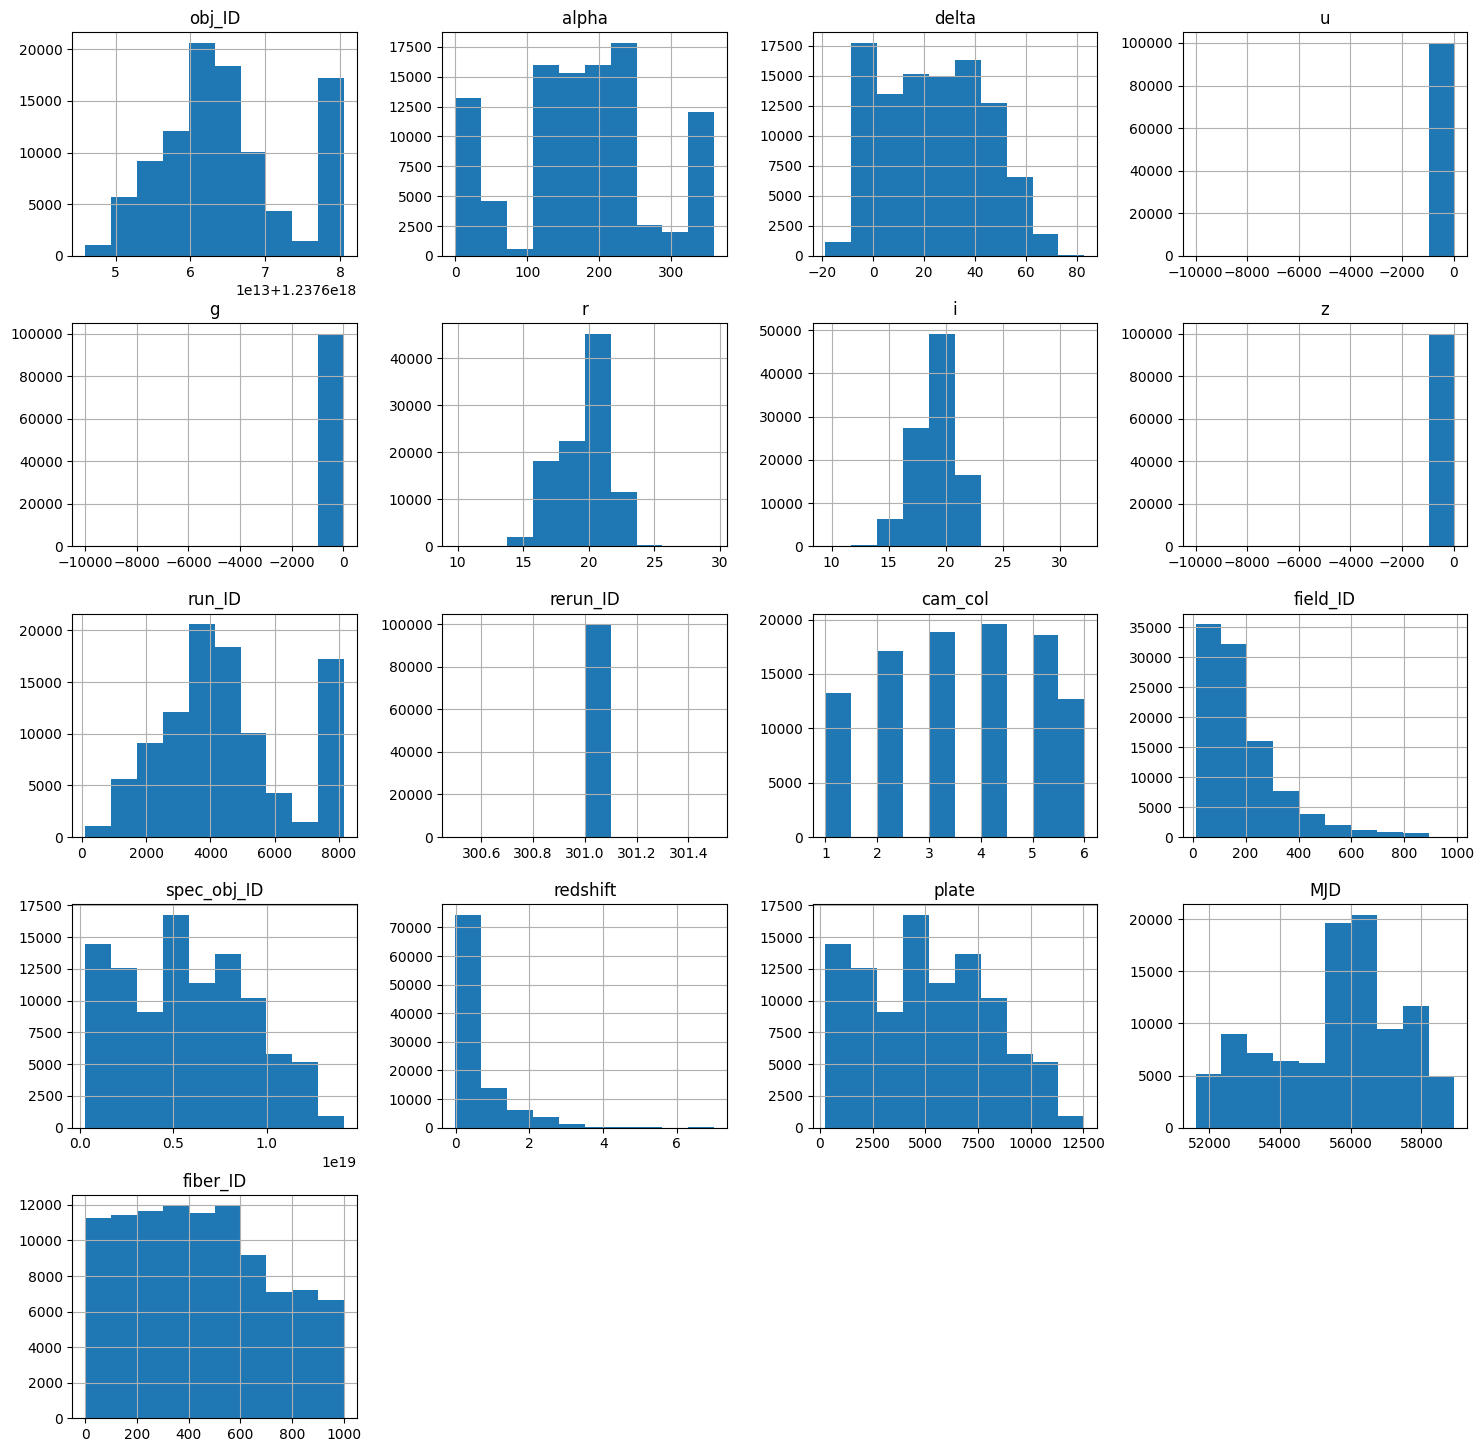

In [4]:
full_df.hist(figsize=(18,18))

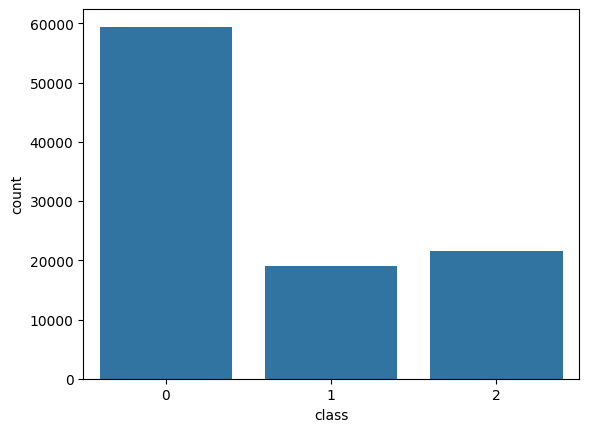

In [5]:
# Initialize LabelEncoder object
label_encoder = LabelEncoder()

# Apply LabelEncoder on 'class' column (target) -> 0 = Galaxy, 1 = Quasar, 2 = Star
full_df['class'] = label_encoder.fit_transform(full_df['class'])
# create dict with { label: value } (funziona solo quando viene eseguito dall'inizio se no diventa { value: value })
#label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
# per non dover rieseguire tutto il codice dall'inizio
label_mapping = { 'Galaxy': 0, 'Quasar': 1, 'Star': 2 }

#Check distribution of target variable
sns.countplot(x = full_df['class'])
plt.show()

<Axes: >

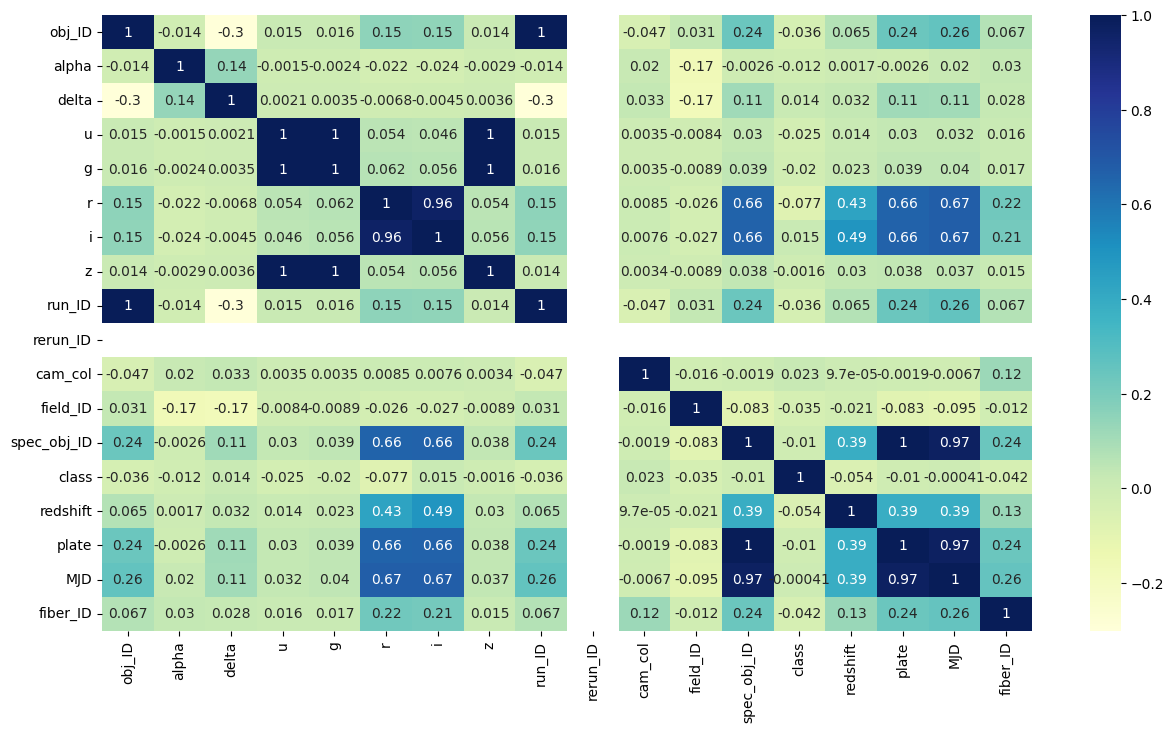

In [6]:
# Check correlation between features
plt.figure(figsize=(15,8))
sns.heatmap(full_df.corr(), annot=True, cmap='YlGnBu')

In [7]:
# Remove 'rerun_ID' column as it has only one value and is not useful for classification
full_df.drop(['rerun_ID'], axis=1, inplace=True)

# Split dataset into train and test sets
x = full_df.drop(['class'], axis=1)
y = full_df['class']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
y_train_ = y_train
y_test_ = y_test


# Rete neurale

In [12]:
# Feature scaling (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[-1.74860163, -1.35535338, -1.59319084, ..., -1.58378272,
        -2.02166002,  0.49725676],
       [-0.39697293,  0.19184683,  1.20952886, ..., -1.24481129,
        -1.36505798, -0.09340897],
       [-0.28564128,  0.47137041,  1.09023793, ...,  0.5424926 ,
         0.43009644, -0.25116441],
       ...,
       [ 0.36420232, -0.38605017, -0.39254732, ...,  0.05824771,
         0.22725726, -0.70241835],
       [ 0.59940342, -1.66280513, -0.87404611, ...,  2.01046577,
         1.57472846, -0.51164433],
       [-1.33255895, -1.39528931, -1.61777578, ...,  0.65119373,
         0.55611098, -0.91520476]])

In [13]:
# Convert target variable to categorical, as it is a multi-class classification problem
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

print(y_train)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [14]:
input_features = X_train.shape[1]

model=Sequential()
model.add(Dense(32, input_dim=input_features, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=100, verbose=1, validation_data=(X_test, y_test))

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

Epoch 1/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4433 - accuracy: 0.8363 - val_loss: 0.2018 - val_accuracy: 0.9391
Epoch 2/100
800/800 [==============================] - 3s 3ms/step - loss: 0.1932 - accuracy: 0.9441 - val_loss: 0.1583 - val_accuracy: 0.9507
Epoch 3/100
800/800 [==============================] - 2s 3ms/step - loss: 0.1529 - accuracy: 0.9536 - val_loss: 0.1421 - val_accuracy: 0.9581
Epoch 4/100
800/800 [==============================] - 2s 2ms/step - loss: 0.1392 - accuracy: 0.9584 - val_loss: 0.1311 - val_accuracy: 0.9606
Epoch 5/100
800/800 [==============================] - 2s 2ms/step - loss: 0.1315 - accuracy: 0.9608 - val_loss: 0.1243 - val_accuracy: 0.9631
Epoch 6/100
800/800 [==============================] - 2s 2ms/step - loss: 0.1254 - accuracy: 0.9628 - val_loss: 0.1203 - val_accuracy: 0.9643
Epoch 7/100
800/800 [==============================] - 2s 2ms/step - loss: 0.1232 - accuracy: 0.9630 - val_loss: 0.1202 - val_accuracy: 0.9639

KeyboardInterrupt: 

# Pca

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

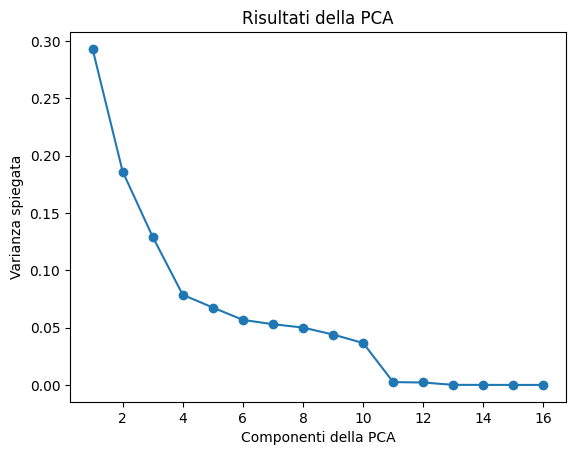

In [9]:
# Split dataset into train and test sets
x = full_df.drop(['class'], axis=1)
y = full_df['class']

# standardizziamo i dati (calculated as: z = (x - u) / s, u = mean, s = std)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)
scaled_data

pca = PCA().fit(scaled_data)

# Crea un grafico della varianza spiegata per ogni componente
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Componenti della PCA')
plt.ylabel('Varianza spiegata')
plt.title("Risultati della PCA")
plt.show()

In [10]:
# Applica la PCA per ridurre la dimensionalità dei dati
pca = PCA(n_components=12).fit(scaled_data)
pca_data = pca.transform(scaled_data)
# Quantifichiamo  la percentuale di varianza spiegata da ciascuno delle componenti.
print(pca.explained_variance_ratio_)

# split dataset after PCA
#X_train, X_test, y_train, y_test = train_test_split(pca_data, y, test_size=0.2)
# split dataset after standardization no pca
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2)

[0.29323714 0.18625784 0.12923462 0.07864501 0.06756852 0.05676373
 0.05299149 0.05006391 0.04396882 0.03659934 0.00246618 0.00212123]


# Bayes

In [ ]:
# creazione e addestramento del classificatore
nb = GaussianNB()
nb.fit(X_train, y_train)

# classificazione del test set
y_pred = nb.predict(X_test)

# calcolo dell'accuratezza
# label_mapping dict: Galaxy = 0, Quasar = 1, Star = 2
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuratezza: {accuracy}\n\n")
print(classification_report(y_test, y_pred, target_names=label_mapping.keys()))
print("\n\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))

# SVM

In [18]:
from sklearn import svm

# Crea il classificatore SVM
# C = 1 default provato C=100 cambia pochissimo non vale la pena
sv = svm.SVC(kernel='linear', C=1)

sv.fit(X_train, y_train)
y_pred = sv.predict(X_test)

# calcolo dell'accuratezza
# label_mapping dict: Galaxy = 0, Quasar = 1, Star = 2
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuratezza: {accuracy}\n\n")
print(classification_report(y_test, y_pred, target_names=label_mapping.keys()))
print("\n\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))

ValueError: y should be a 1d array, got an array of shape (80000, 3) instead.

## Decision Tree


In [26]:

model = DecisionTreeClassifier(random_state = 30)
model.fit(X_train, y_train)
y_pred3 = model.predict(X_test)

dtree_score = recall_score(y_test, y_pred3, average='weighted')
print(dtree_score)

0.9657


In [33]:
# Visualizza l'albero decisionale
fig, ax = plt.subplots(figsize=(150, 100))
plot_tree(model, filled=True, ax=ax)
plt.plot()
plt.savefig("quattr.svg", format="svg")